In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [2]:
# 한글 폰트,  -부호깨짐 방지
import matplotlib

matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"] = False

In [3]:
# titanic data 읽기

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [9]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [10]:
train['Ticket'].nunique()

681

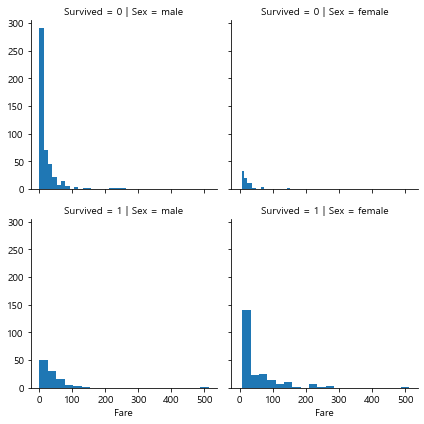

In [11]:
facet = sns.FacetGrid(train, col='Sex', row='Survived', height=3)
facet = facet.map(plt.hist, 'Fare',bins=20)

In [12]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',  stacked=True,  figsize=(10,5))

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Family_Size = SibSp + Parch 만들기
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1  # 자기 포함
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [15]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [16]:
train['Name'].nunique()

891

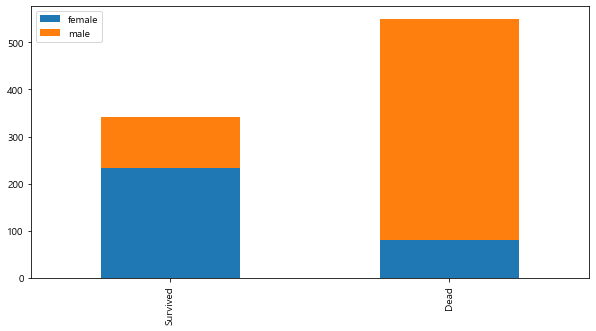

In [17]:
bar_chart('Sex')

In [18]:
# 방법 1.
# combining train test dataset ??
#train_test_data = [train,  test]

# ()는 가져올 그룹?, [A-Za-z] 알파벳, +한번이상 반복, *0번이상 반복, \. 점이 붙은
#for dataset in train_test_data:
#    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# 방법 2
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [20]:
# pd.crosstab(a, b)
pd.crosstab(train['Title'], train['Sex']) #.T.style.background_gradient(cmap="summer_r")

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
# 명칭을 (master,) miss, mrs, mr, other로 replace
train['Title'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer',
                        'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                       ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other',
                        'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
test['Title'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer',
                        'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                       ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other',
                        'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

<AxesSubplot:xlabel='Title'>

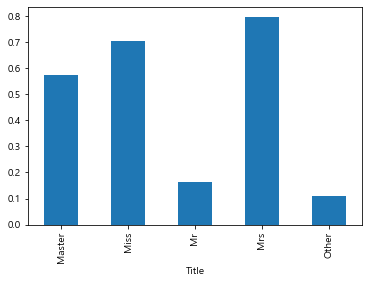

In [22]:
train.groupby('Title')['Survived'].mean().plot.bar()

In [23]:
train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
Title,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,1.222222


## df.loc['A', 'B'] 는 'A'는 행 'B'는 열을 나타낸다. *****

In [24]:
# NaN 값 치환. 나이의 NaN값을 Title의 평균 값으로
#train.loc[(train.Age.isnull())&(train.Title=='Mr'), 'Age'] = 
train.loc[(train.Age.isnull()) & (train.Title=='Mr'), 'Age'] = train.loc[train.Title == 'Mr', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Mrs'), 'Age'] = train.loc[train.Title == 'Mrs', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Master'), 'Age'] = train.loc[train.Title == 'Master', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Miss'), 'Age'] = train.loc[train.Title == 'Miss', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Other'), 'Age'] = train.loc[train.Title == 'Other', 'Age'].mean().astype(int)

# test 값 치환. train 값을 기준으로
train.loc[(train.Age.isnull()) & (train.Title=='Mr'), 'Age'] = train.loc[train.Title == 'Mr', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Mrs'), 'Age'] = train.loc[train.Title == 'Mrs', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Master'), 'Age'] = train.loc[train.Title == 'Master', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Miss'), 'Age'] = train.loc[train.Title == 'Miss', 'Age'].mean().astype(int)
train.loc[(train.Age.isnull()) & (train.Title=='Other'), 'Age'] = train.loc[train.Title == 'Other', 'Age'].mean().astype(int)


In [25]:
print(train.Embarked.value_counts())
train.Embarked.mode()[0]  ##### [0]번쨰 값...***

S    644
C    168
Q     77
Name: Embarked, dtype: int64


'S'

In [26]:
# 이제 Embarked만 남았다... NaN 2개 는 최빈수로 대체
#train['Embarked'].fillna(train.Embarked.mod()[0], inplace=True)
train['Embarked'].fillna('S', inplace=True)

In [27]:
test.Embarked.isnull().sum()

0

In [28]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 32.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 21.  , 40.  , 66.  , 42.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [30]:
# 나이를 10살단위 categories로
train['Age_cat'] = 0

#train.loc[train['Age'] < 10, 'Age_cat'] = 0
#train.loc[(10 <= train['Age']) & (train['Age'] < 20), 'Age_cat'] = 1
train.loc[train.Age < 10, 'Age_cat'] = 0
train.loc[(10 <= train.Age) & (train.Age < 20), 'Age_cat'] = 1
train.loc[(20 <= train.Age) & (train.Age < 30), 'Age_cat'] = 2
train.loc[(30 <= train.Age) & (train.Age < 40), 'Age_cat'] = 3
train.loc[(40 <= train.Age) & (train.Age < 50), 'Age_cat'] = 4
train.loc[(50 <= train.Age) & (train.Age < 60), 'Age_cat'] = 5
train.loc[(60 <= train.Age) & (train.Age < 70), 'Age_cat'] = 6
train.loc[70 <= train.Age, 'Age_cat'] = 7

test.loc[test.Age < 10, 'Age_cat'] = 0
test.loc[(10 <= test.Age) & (test.Age < 20), 'Age_cat'] = 1
test.loc[(20 <= test.Age) & (test.Age < 30), 'Age_cat'] = 2
test.loc[(30 <= test.Age) & (test.Age < 40), 'Age_cat'] = 3
test.loc[(40 <= test.Age) & (test.Age < 50), 'Age_cat'] = 4
test.loc[(50 <= test.Age) & (test.Age < 60), 'Age_cat'] = 5
test.loc[(60 <= test.Age) & (test.Age < 70), 'Age_cat'] = 6
test.loc[70 <= test.Age, 'Age_cat'] = 7


# 함수를 만들어 apply method를 사용하는 방법

def categories_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x <  60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

train['Age_cat'] = train['Age'].aply(categories_age)
test['Age_cat'] = test['Age'].apply(categories_age)

In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Miss,6.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mrs,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mr,2.0


In [32]:
# Embarked  mapping 해봅시다
# LabelEncoder, OneHotEncoder ... 쓸수도  있음...
# Object 값 숫자로 바꾸기
train['Sex'] = train['Sex'].replace(['male', 'female'], [1, 0])
test['Sex'] = test['Sex'].replace(['male', 'female'], [1, 0])

train['Embarked'] = train['Embarked'].map({'C':0,'Q':1,'S':2})
test['Embarked'] = test['Embarked'].map({'C':0,'Q':1,'S':2})


In [33]:
# Fare 정규화


In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1,Mr,3


In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Age_cat
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,1,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,2,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,1,Miss,6.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,1,Mrs,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,3,Mr,2.0


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Age_cat
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.643288,0.523008,0.381594,32.204208,1.536476,1.904602,2.564534
std,257.353842,0.486592,0.836071,0.477990,13.278897,1.102743,0.806057,49.693429,0.791503,1.613459,1.362845
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000,1.000000,2.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000,1.000000,3.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000,7.000000


<AxesSubplot:title={'center':'Pearson Correlation  of Features'}>

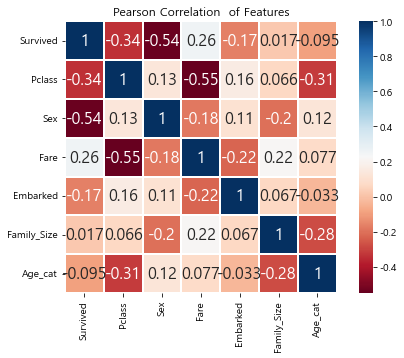

In [37]:
# correlation on hitmap plot

hmd = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family_Size', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(8, 5))
plt.title('Pearson Correlation  of Features')
sns.heatmap(hmd.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True,annot_kws={"size":16})



In [38]:
# Title, Embarked, data preprocessing  OneHot Encoding. 여기서는 get_dummies 사용
train = pd.get_dummies(train, columns=['Title'], prefix='Title')
test = pd.get_dummies(test, columns=['Title'], prefix='Title')

train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size,Age_cat,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1,3,0,0,1,0,0,0,0,1


In [39]:
# 필요 없는 컬럼들 삭제. (SibSp, Parch, Cabin, Ticket)
train.drop(['PassengerId', 'Name', 'SibSp','Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'SibSp','Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [40]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Family_Size,Age_cat,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,7.2500,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,71.2833,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,7.9250,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,53.1000,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,8.0500,1,3,0,0,1,0,0,0,0,1


In [41]:
test.head()

,Pclass,Sex,Age,Fare,Family_Size,Age_cat,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,7.8292,1,3.0,0,0,1,0,0,0,1,0
1,3,0,47.0,7.0000,2,4.0,0,0,0,1,0,0,0,1
2,2,1,62.0,9.6875,1,6.0,0,1,0,0,0,0,1,0
3,3,1,27.0,8.6625,1,2.0,0,0,0,1,0,0,0,1
4,3,0,22.0,12.2875,3,2.0,0,0,1,0,0,0,0,1


In [49]:
# 정규화
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# MinMaxScaler()
# StandardScaler()
scaler = MinMaxScaler()

# fit은 
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.fit_transform(test)


# 준비 완료....

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# train값을 DataFrame에서 survived를 제외한 값을 할당, target값은 survived
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values

X_test = test.values

In [44]:
# Train, Test셑 분리
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=1956)

In [45]:
# Train and Prediction
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

prediction = model.predict(X_vld)

# 통계 자료

- Feature Importance: model의 attr중 하나

In [46]:
print(f"총 {y_vld.shape[0]}명 중 {100 *metrics.accuracy_score(prediction, y_vld):.2f}% 정확도로 생존을 맞춤")

총 268명 중 83.96% 정확도로 생존을 맞춤


In [47]:
from pandas import Series

feature_importance = model.feature_importances_
feature_importance_Series = Series(feature_importance, index=test.columns)


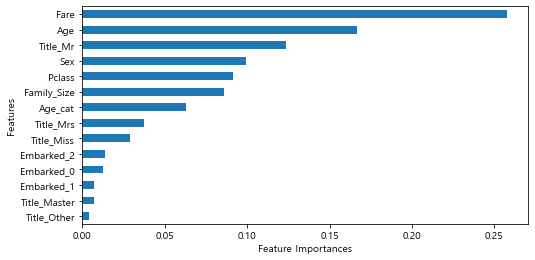

In [48]:
plt.figure(figsize=(8,4))
feature_importance_Series.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.show()